In [ ]:
from alg.simple import SimpleAlgorithm
from alg.fuzzy import FuzzyAlgorithm
from alg.IRM import IRM_CNN, IRM_MLP
from data.dataset import MNISTDataset
import torch
from torch.utils.data import DataLoader
import numpy as npy
from tqdm import tqdm

import torch
import numpy as np
import random
import os
 
def setup_seed(seed=3407):
    random.seed(seed)  # Python的随机性
    os.environ['PYTHONHASHSEED'] = str(seed)  # 设置Python哈希种子，为了禁止hash随机化，使得实验可复现
    np.random.seed(seed)  # numpy的随机性
    torch.manual_seed(seed)  # torch的CPU随机性，为CPU设置随机种子
    torch.cuda.manual_seed(seed)  # torch的GPU随机性，为当前GPU设置随机种子
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.   torch的GPU随机性，为所有GPU设置随机种子
    torch.backends.cudnn.deterministic = True # 选择确定性算法
    torch.backends.cudnn.benchmark = False # if benchmark=True, deterministic will be False
    torch.backends.cudnn.enabled = False
setup_seed(3407)

train_dataset = MNISTDataset("./processed_data", "train")
val_dataset = MNISTDataset("./processed_data", "val")

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=True, num_workers=4)

In [2]:
alg_sim = SimpleAlgorithm()
epochs = 1
for epoch in range(epochs):
    alg_sim.train(train_loader)
    wrong_pred,_ = alg.evaluate(val_loader)
# print(wrong_pred)

NameError: name 'alg' is not defined

In [4]:
data = torch.cat(wrong_pred[0])
labels = torch.cat(wrong_pred[1])
true_labels = torch.cat(wrong_pred[2])

pred label:  tensor(1) ,  true_label tensor(8)


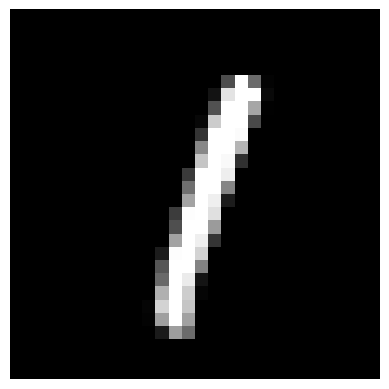

pred label:  tensor(6) ,  true_label tensor(1)


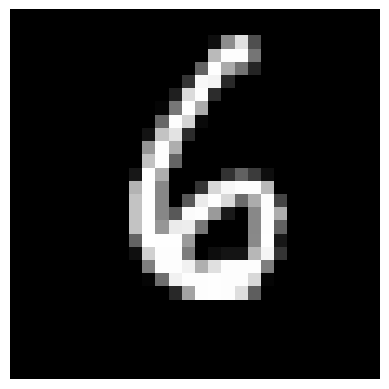

pred label:  tensor(1) ,  true_label tensor(9)


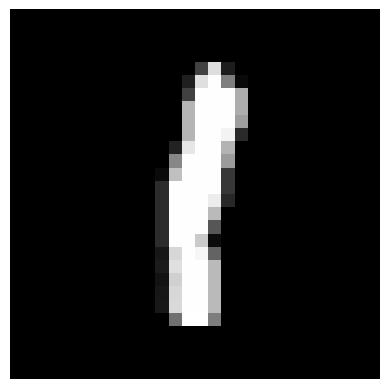

pred label:  tensor(8) ,  true_label tensor(5)


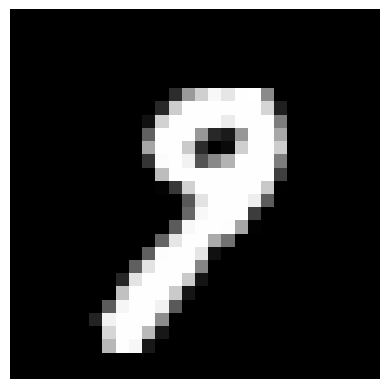

pred label:  tensor(3) ,  true_label tensor(2)


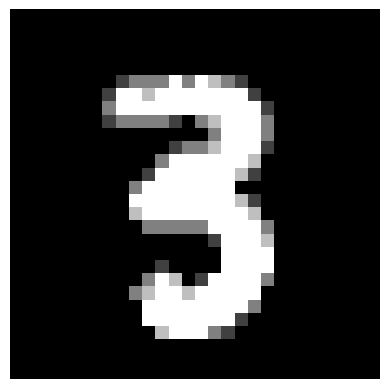

pred label:  tensor(8) ,  true_label tensor(9)


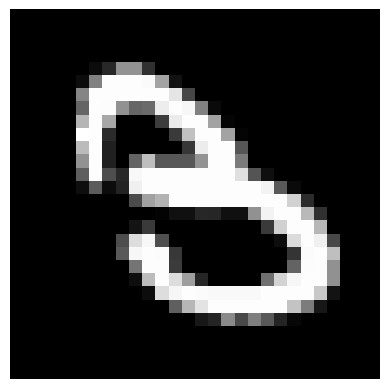

pred label:  tensor(6) ,  true_label tensor(7)


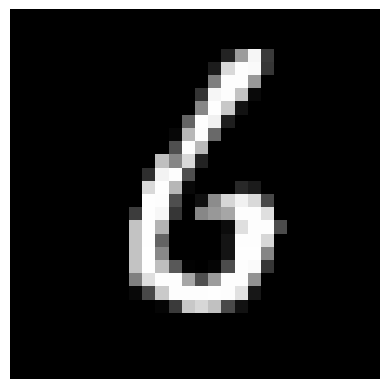

pred label:  tensor(7) ,  true_label tensor(1)


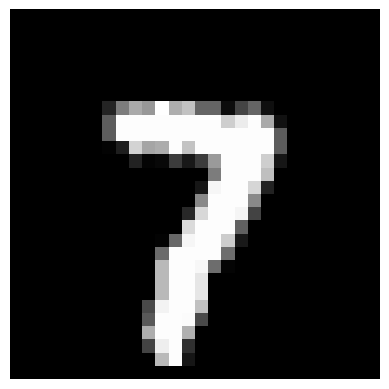

pred label:  tensor(1) ,  true_label tensor(6)


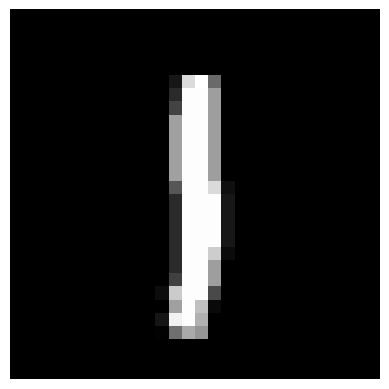

pred label:  tensor(0) ,  true_label tensor(9)


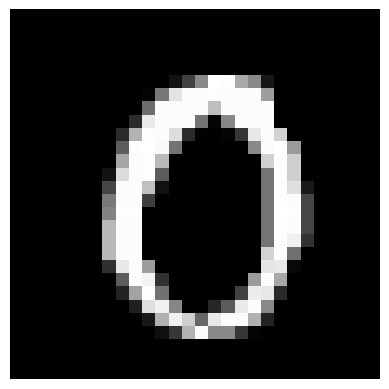

pred label:  tensor(8) ,  true_label tensor(7)


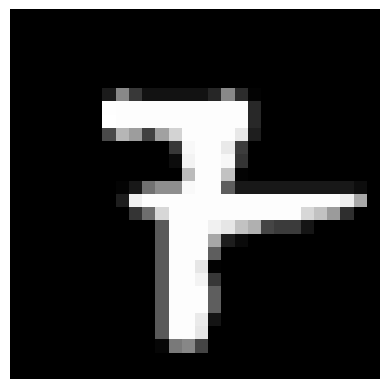

pred label:  tensor(4) ,  true_label tensor(5)


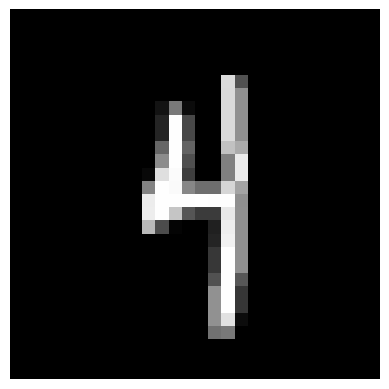

pred label:  tensor(1) ,  true_label tensor(6)


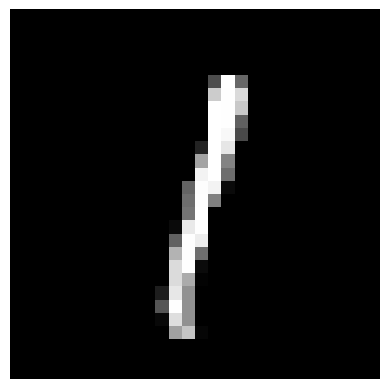

pred label:  tensor(4) ,  true_label tensor(5)


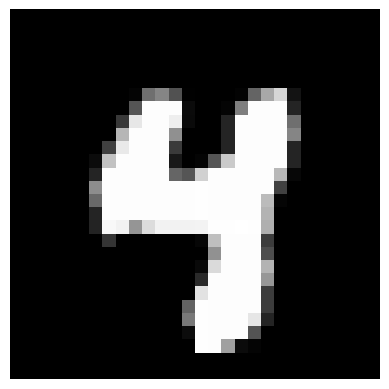

pred label:  tensor(4) ,  true_label tensor(7)


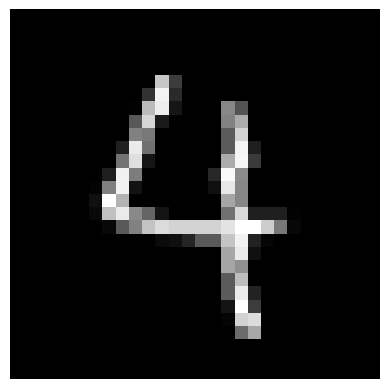

pred label:  tensor(3) ,  true_label tensor(9)


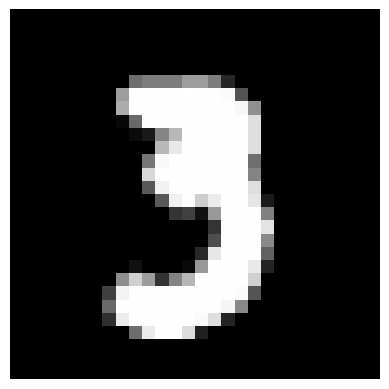

pred label:  tensor(2) ,  true_label tensor(5)


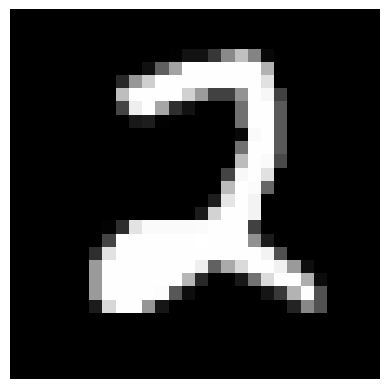

pred label:  tensor(3) ,  true_label tensor(0)


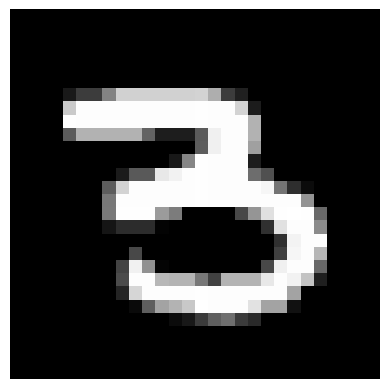

pred label:  tensor(2) ,  true_label tensor(7)


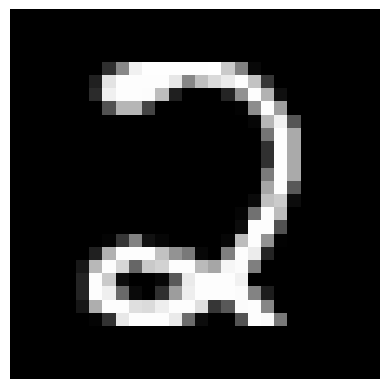

pred label:  tensor(8) ,  true_label tensor(5)


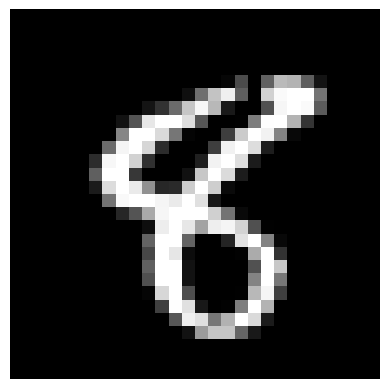

pred label:  tensor(1) ,  true_label tensor(2)


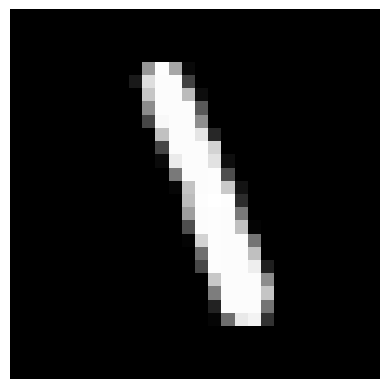

pred label:  tensor(1) ,  true_label tensor(8)


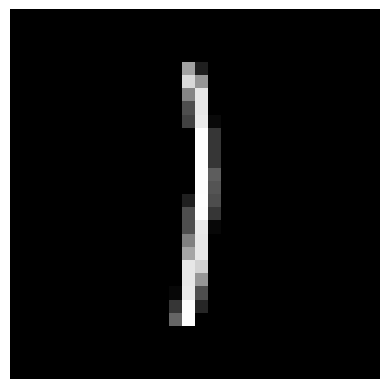

pred label:  tensor(7) ,  true_label tensor(4)


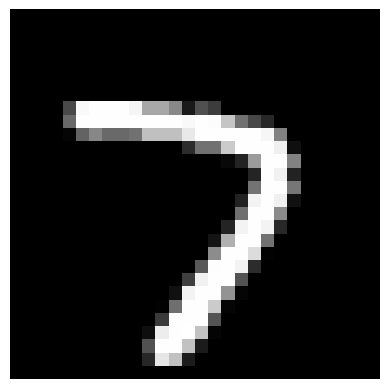

pred label:  tensor(0) ,  true_label tensor(9)


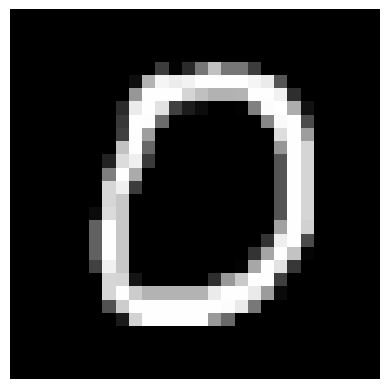

In [5]:
from utils import visial
for fig, label, t_label in zip(data, labels, true_labels):
    print("pred label: ", label, ", ", "true_label", t_label)
    visial(fig)

In [10]:
alg = FuzzyAlgorithm()
epochs = 5
for epoch in range(epochs):
    alg.train(train_loader)
    wrong_pred,_ = alg.evaluate(val_loader)

100%|████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 34.40it/s]


Accuracy on the val set: 77 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:28<00:00, 32.97it/s]


Accuracy on the val set: 76 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:28<00:00, 33.25it/s]


Accuracy on the val set: 75 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 34.37it/s]


Accuracy on the val set: 76 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:26<00:00, 35.52it/s]


Accuracy on the val set: 77 %


In [7]:
alg_fuz = FuzzyAlgorithm(shuffle=False)
for epoch in range(epochs):
    alg.train(train_loader)
    wrong_pred,_ = alg.evaluate(val_loader)

100%|████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 33.98it/s]


Accuracy on the val set: 14 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:29<00:00, 32.24it/s]


Accuracy on the val set: 17 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 34.68it/s]


Accuracy on the val set: 15 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:27<00:00, 33.65it/s]


Accuracy on the val set: 21 %


100%|████████████████████████████████████████████████████████████████████| 938/938 [00:26<00:00, 35.25it/s]


Accuracy on the val set: 19 %


In [11]:
alg.model.eval()
correct = total = 0
test_loader = train_loader
with torch.no_grad():
    for data, labels in test_loader:
        # data = reduce(data)
        outputs = alg.model(data)
        _, predicted = torch.max(outputs.data, 1)
        # print(predicted, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
#         wrong_pred[0].append(data[predicted != labels])
#         wrong_pred[1].append(predicted[predicted != labels])
#         wrong_pred[2].append(labels[predicted != labels])
accuracy = correct / total
print(accuracy)

0.7369166666666667


In [2]:
train_dataset4IRM1 = train_dataset[::2]
train_dataset4IRM2 = train_dataset[1::2]
val_dataset4IRM = val_dataset

train_loader4IRM1 = DataLoader(dataset=train_dataset4IRM1, batch_size=64, shuffle=True)
train_loader4IRM2 = DataLoader(dataset=train_dataset4IRM2, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=True)

In [ ]:
alg_irm = IRM_MLP(penalty_weight=10000)
for epoches in tqdm(range(alg_irm.steps)):
    alg_irm.train_with_eval(train_loader4IRM1, train_loader4IRM2, val_loader)
    if epoches % 100 == 0：
        alg_irm.evaluate(val_loader)

In [7]:
alg_irm.save("./model/irm.pkl")